# 6. 金融时间序列

金融学中遇到最重要的数据类型之一是金融时间序列，以日期或时间作为索引的数据。例如股价就表现为时间序列数据。
类似的，美元-欧元汇率也是金融时间序列，汇率在短暂的时间间隔内报价，一组此类报价就是汇率的时间序列。

Python中处理时间序列的主要工具是pandas库，pandas的作者Wes McKinney在大型对冲基金AQR资本管理公司任职分析师时开发这个库。

DataFrame和Series等基本类的灵感来自统计分析语言R，该语言无疑长于这类建模和分析工作。

本章主要基于几个来自金融环境的例子，这些例子按照如下的步骤推进：

**第一步和第二步**

使用非常简单和小型的数据集开始探索pandas的功能；然后用NumPy ndarray对象将其转换为DataFrame对象，在此过程介绍基本的分析和可视化过程

**来自Web的数据**

pandas允许我们方便地从Web上读取数据--列如从雅虎财经--并以多种方式分析这些数据

**使用来自CSV文件的数据**

逗号分隔符（CSV）文件是交换金融时间序列数据的全球标准之一；pandas可以高效从这些文件中读取数据，使用两种数据，我们利用pandas实施一次回归分析

**高频数据**

今年来，可用的金融时间序列数据越来越多地从每日报价转向分时数据，每日分时股价数据量通常超过30年间收集的每日报价数据

按照定义，所有金融时间序列数据都包含日期或时间信息。

## 6.1 pandas基础

pandas是在NumPy基础上构建的。比如，NumPy通用函数通常也可以在pandas对象上工作。

In [1]:
import numpy as np
import pandas as pd

### 6.1.1 使用DataFrame类的第一步

DataFrame类设计用来管理具有索引和标签的数据，这些数据与来自SQL数据表或电子表格应用中的数据没有太多不同。

下面是创建DataFrame对象的过程

In [24]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


DataFrame在存储数据上的主要特性：

*数据*

  数据本身可以用不同组成及类型提供(列表，元组，ndarray和字典对象都是候选者)
  
*标签*

  数据组织为列，可以定义为列名
  
*索引*

  索引可以使用不同的格式，

使用这种DataFrame对象总体上相当方便和高效，当想要扩大现有对象时，常规的ndarray对象更专门化，也更受限制。

下面是简单的列子，说明DataFrame对象上操作的工作方式：

In [25]:
df.index  # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [26]:
df.columns # the column names

Index([u'numbers'], dtype='object')

In [27]:
df.loc['c'] # selection via index

numbers    30
Name: c, dtype: int64

In [28]:
df.loc[df.index[1:3]] # selection via index object

,numbers
b,20
c,30


In [29]:
df.loc[df.index[1:3]] 

,numbers
b,20
c,30


In [30]:
df.sum() # sum per column

numbers    100
dtype: int64

In [31]:
df.apply(lambda x: x ** 2) # square of every element

,numbers
a,100
b,400
c,900
d,1600


一般来说，可以在DataFrame对象上进行NumPy ndarray对象相同的向量化操作

In [32]:
df ** 2

,numbers
a,100
b,400
c,900
d,1600


在两个维度上同时扩增DataFrame对象是可能的

In [33]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [34]:
df['floats'] # selection via column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

也可以通过DataFrame对象定义一个新列，在这种情况下，索引自动分配

In [35]:
df['name'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index=['a', 'b', 'c', 'd'])
df

,numbers,floats,name
a,10,1.5,Yves
b,20,2.5,Guido
c,30,3.5,Felix
d,40,4.5,Francesc


通常避免的一个副作用--索引被简单的编号索引代替

In [36]:
df.append({'numbers':100, 'floats':5.75, 'name':'Henry'}, ignore_index=True)

,numbers,floats,name
0,10,1.50,Yves
1,20,2.50,Guido
2,30,3.50,Felix
3,40,4.50,Francesc
4,100,5.75,Henry


附件一个DataFrame对象以提供一个正确的索引往往是更好的做法：

In [38]:
df = df.append(pd.DataFrame({'numbers':100, 'floats':5.75, 'name':'Henry'}, index=['z', ]))
df

,floats,name,numbers
a,1.50,Yves,10
b,2.50,Guido,20
c,3.50,Felix,30
d,4.50,Francesc,40
z,5.75,Henry,100


pandas的优势之一是处理缺漏的信息，下面代码添加一个新列，但使用不同的索引，在此使用相当灵活的join方法：

In [39]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares,']))

,floats,name,numbers,"squares,"
a,1.50,Yves,10,1
b,2.50,Guido,20,4
c,3.50,Felix,30,9
d,4.50,Francesc,40,16
z,5.75,Henry,100,NaN


pandas默认只接受已经存在的值，丢失了索引为y的值，在索引位置z可以看到NaN值，为了保留这两个索引，可以提供一个附加参数，告诉pandas如何连接。列子中how='outer'表示使用两个索引中所有值得并集

In [40]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares',]), how='outer')

,floats,name,numbers,squares
a,1.50,Yves,10,1
b,2.50,Guido,20,4
c,3.50,Felix,30,9
d,4.50,Francesc,40,16
y,NaN,NaN,NaN,25
z,5.75,Henry,100,NaN


现在，索引确实两个原始索引的并集。在扩增的新索引中，丢失的数据点都是由NaN值代替。

连接操作的其他选项包括inner(索引的交集)，left(默认值，使用调用方法的对象中的索引值)以及right(使用被连接对象的索引值)。

尽管有丢失的值，但是大部分方法调用仍然有效

In [47]:
df[df.columns[:]].mean()

floats      3.55
numbers    40.00
dtype: float64

### 6.1.2 使用DataFrame类的第二步

从现在开始处理数值数据，随着进程增加DatetimeIndex等功能，以管理时间序列数据。

为了生成一个模拟数据集，按照下面的列子，生成一个9行4列标准正态分布伪随机数的numpy.ndarray:

In [49]:
a = np.random.standard_normal((9,4))
a.round(6)

array([[ 0.240426, -0.727039, -1.060348,  0.04434 ],
       [-1.784189,  0.660923,  0.653776,  0.31924 ],
       [-1.553514, -0.979725, -0.915245,  0.120317],
       [ 0.827732, -0.769938,  1.235558,  0.656322],
       [-0.575877,  2.039913,  0.177487,  1.2849  ],
       [-0.196037, -0.692984,  1.050895,  1.553751],
       [-0.191538,  1.422545, -0.197356, -0.754794],
       [-0.315892, -0.793517,  0.324522,  0.179706],
       [-1.173402, -0.364282, -1.822231, -0.270543]])

可以直接构造DataFrame对象，但是使用ndarray对象通常是一个好选择，因为pandas将保留基本结构，“只”添加元信息

In [50]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.240426,-0.727039,-1.060348,0.044340
1,-1.784189,0.660923,0.653776,0.319240
2,-1.553514,-0.979725,-0.915245,0.120317
3,0.827732,-0.769938,1.235558,0.656322
4,-0.575877,2.039913,0.177487,1.284900
5,-0.196037,-0.692984,1.050895,1.553751
6,-0.191538,1.422545,-0.197356,-0.754794
7,-0.315892,-0.793517,0.324522,0.179706
8,-1.173402,-0.364282,-1.822231,-0.270543


DataFrame对象可以通过指定一个具有合适数量元素的列表，直接定义列名

下面的例子说明，可随时定义/更改DataFrame对象的属性：

In [52]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,0.240426,-0.727039,-1.060348,0.044340
1,-1.784189,0.660923,0.653776,0.319240
2,-1.553514,-0.979725,-0.915245,0.120317
3,0.827732,-0.769938,1.235558,0.656322
4,-0.575877,2.039913,0.177487,1.284900
5,-0.196037,-0.692984,1.050895,1.553751
6,-0.191538,1.422545,-0.197356,-0.754794
7,-0.315892,-0.793517,0.324522,0.179706
8,-1.173402,-0.364282,-1.822231,-0.270543


列名提供访问DataFrame对象中数据的高效机制，和结构数组类似：

In [53]:
df['No2'][3]

-0.76993805447710428

为高效处理金融时间序列数据，必须处理好时间索引，也视为pandas的重要优势。

假定为4列9行的数据项对应于2016年9月底的索引，用data_range生成一个DatetimeIndex对象：

In [54]:
dates = pd.date_range('2016-9-29', periods=9, freq='M')
dates

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')

In [55]:
df.index = dates
df

,No1,No2,No3,No4
2016-09-30,0.240426,-0.727039,-1.060348,0.044340
2016-10-31,-1.784189,0.660923,0.653776,0.319240
2016-11-30,-1.553514,-0.979725,-0.915245,0.120317
2016-12-31,0.827732,-0.769938,1.235558,0.656322
2017-01-31,-0.575877,2.039913,0.177487,1.284900
2017-02-28,-0.196037,-0.692984,1.050895,1.553751
2017-03-31,-0.191538,1.422545,-0.197356,-0.754794
2017-04-30,-0.315892,-0.793517,0.324522,0.179706
2017-05-31,-1.173402,-0.364282,-1.822231,-0.270543


本小节从NumPy ndarray对象开始，以形式上更丰富的pandas DataFrame对象结束。

In [56]:
np.array(df).round(6)

array([[ 0.240426, -0.727039, -1.060348,  0.04434 ],
       [-1.784189,  0.660923,  0.653776,  0.31924 ],
       [-1.553514, -0.979725, -0.915245,  0.120317],
       [ 0.827732, -0.769938,  1.235558,  0.656322],
       [-0.575877,  2.039913,  0.177487,  1.2849  ],
       [-0.196037, -0.692984,  1.050895,  1.553751],
       [-0.191538,  1.422545, -0.197356, -0.754794],
       [-0.315892, -0.793517,  0.324522,  0.179706],
       [-1.173402, -0.364282, -1.822231, -0.270543]])

### 6.1.3 基本分析

和NumPy数组一样，pandas DataFrame类有多个便利的内建方法、

比如可以轻松地获得按列总和，平均值和累计总和

In [59]:
df.sum()

No1   -4.722291
No2   -0.204104
No3   -0.552942
No4    3.133240
dtype: float64

In [60]:
df.mean()

No1   -0.524699
No2   -0.022678
No3   -0.061438
No4    0.348138
dtype: float64

In [61]:
df.cumsum()

,No1,No2,No3,No4
2016-09-30,0.240426,-0.727039,-1.060348,0.044340
2016-10-31,-1.543762,-0.066116,-0.406572,0.363580
2016-11-30,-3.097277,-1.045841,-1.321817,0.483897
2016-12-31,-2.269545,-1.815779,-0.086259,1.140219
2017-01-31,-2.845422,0.224134,0.091228,2.425120
2017-02-28,-3.041459,-0.468850,1.142123,3.978871
2017-03-31,-3.232997,0.953695,0.944767,3.224077
2017-04-30,-3.548889,0.160178,1.269290,3.403783
2017-05-31,-4.722291,-0.204104,-0.552942,3.133240


In [62]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.524699,-0.022678,-0.061438,0.348138
std,0.847445,1.114726,1.029729,0.724451
min,-1.784189,-0.979725,-1.822231,-0.754794
25%,-1.173402,-0.769938,-0.915245,0.044340
50%,-0.315892,-0.692984,0.177487,0.179706
75%,-0.191538,0.660923,0.653776,0.656322
max,0.827732,2.039913,1.235558,1.553751


In [63]:
np.sqrt(df)

,No1,No2,No3,No4
2016-09-30,0.490333,NaN,NaN,0.210570
2016-10-31,NaN,0.812972,0.808564,0.565014
2016-11-30,NaN,NaN,NaN,0.346868
2016-12-31,0.909798,NaN,1.111557,0.810137
2017-01-31,NaN,1.428255,0.421292,1.133534
2017-02-28,NaN,NaN,1.025132,1.246496
2017-03-31,NaN,1.192705,NaN,NaN
2017-04-30,NaN,NaN,0.569669,0.423918
2017-05-31,NaN,NaN,NaN,NaN


In [64]:
np.sqrt(df).sum()

No1    1.400130
No2    3.433932
No3    3.936213
No4    4.736536
dtype: float64

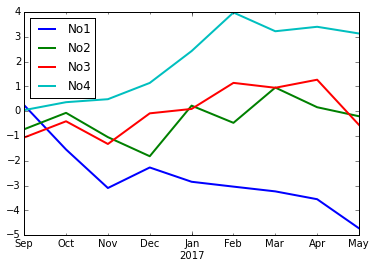

In [65]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

### 6.1.4 Series类

目前主要使用pandas DataFrame类：

In [66]:
type(df)

pandas.core.frame.DataFrame

还有一个专用的Series类，例如从DataFrame对象中选取一列时，就得到了一个Series对象：

In [67]:
df['No1']

2016-09-30    0.240426
2016-10-31   -1.784189
2016-11-30   -1.553514
2016-12-31    0.827732
2017-01-31   -0.575877
2017-02-28   -0.196037
2017-03-31   -0.191538
2017-04-30   -0.315892
2017-05-31   -1.173402
Freq: M, Name: No1, dtype: float64

In [68]:
type(df['No1'])

pandas.core.series.Series

DataFrame的主要方法也可以用于Series对象，可以和以前一样绘制图表

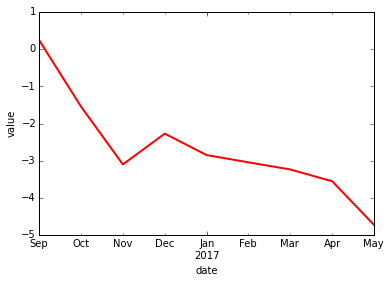

In [69]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

### 6.1.6 GroupBy 操作

pandas具有强大而灵活的分组功能，工作方式类似SQL中的分组和Excel中的透视表。

为了分组，添加一列，表示对应索引数据所属季度：

In [70]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2016-09-30,0.240426,-0.727039,-1.060348,0.044340,Q1
2016-10-31,-1.784189,0.660923,0.653776,0.319240,Q1
2016-11-30,-1.553514,-0.979725,-0.915245,0.120317,Q1
2016-12-31,0.827732,-0.769938,1.235558,0.656322,Q2
2017-01-31,-0.575877,2.039913,0.177487,1.284900,Q2
2017-02-28,-0.196037,-0.692984,1.050895,1.553751,Q2
2017-03-31,-0.191538,1.422545,-0.197356,-0.754794,Q3
2017-04-30,-0.315892,-0.793517,0.324522,0.179706,Q3
2017-05-31,-1.173402,-0.364282,-1.822231,-0.270543,Q3


根据“Quarter”列分组，输出单独组的统计数字

In [72]:
groups = df.groupby('Quarter')
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-1.032426,-0.348614,-0.440606,0.161299
Q2,0.018606,0.192330,0.821313,1.164991
Q3,-0.560278,0.088249,-0.565022,-0.281877


In [73]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.240426,0.660923,0.653776,0.319240
Q2,0.827732,2.039913,1.235558,1.553751
Q3,-0.191538,1.422545,0.324522,0.179706


In [74]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [75]:
分组可以在多列上进行，在多添加一列，表示索引日期的月份是奇数还是偶数

SyntaxError: invalid syntax (<ipython-input-75-ac59009c4be0>, line 1)

In [77]:
df['Odd_Even'] = ['Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2016-09-30,0.240426,-0.727039,-1.060348,0.044340,Q1,Even
2016-10-31,-1.784189,0.660923,0.653776,0.319240,Q1,Odd
2016-11-30,-1.553514,-0.979725,-0.915245,0.120317,Q1,Even
2016-12-31,0.827732,-0.769938,1.235558,0.656322,Q2,Odd
2017-01-31,-0.575877,2.039913,0.177487,1.284900,Q2,Even
2017-02-28,-0.196037,-0.692984,1.050895,1.553751,Q2,Odd
2017-03-31,-0.191538,1.422545,-0.197356,-0.754794,Q3,Even
2017-04-30,-0.315892,-0.793517,0.324522,0.179706,Q3,Odd
2017-05-31,-1.173402,-0.364282,-1.822231,-0.270543,Q3,Even


In [78]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [79]:
groups.size()

Quarter  Odd_Even
Q1       Even        2
         Odd         1
Q2       Even        1
         Odd         2
Q3       Even        2
         Odd         1
dtype: int64

In [52]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.494555 -1.953622 -0.778295 -0.486176
        Odd      -0.725607  0.075158  0.325325  0.158154
Q2      Even      0.356823  0.927142 -0.464767 -0.109898
        Odd      -0.144937 -1.152356 -0.960452  1.098083
Q3      Even      0.751045 -1.036189 -0.486932 -0.139157
        Odd      -1.431640 -0.338399  0.072788  0.432893

## 6.2 金融数据

Web本身提供大量免费金融信息，谷歌或雅虎提供了全面的金融数据。

尽管这些数据有时不能满足专业需求，如拆股的处理，但适合阐述pandas的金融能力

为此，使用pandas内建函数DataReader，从雅虎财经网站读取股价，分析该数据生成不同的图表

In [83]:
import tushare as ts

In [89]:
df = ts.get_k_data('600570')
df.index = df['date']
del df['date']
df.head()

,open,close,high,low,volume,code
date,,,,,,
2014-11-25,50.087,50.087,50.087,43.642,348193,600570
2014-11-26,50.563,54.419,54.875,50.087,244249,600570
2014-11-27,54.786,53.507,55.074,53.120,191348,600570
2014-11-28,53.834,55.034,56.709,52.565,231997,600570
2014-12-01,54.429,55.817,58.692,53.547,242659,600570


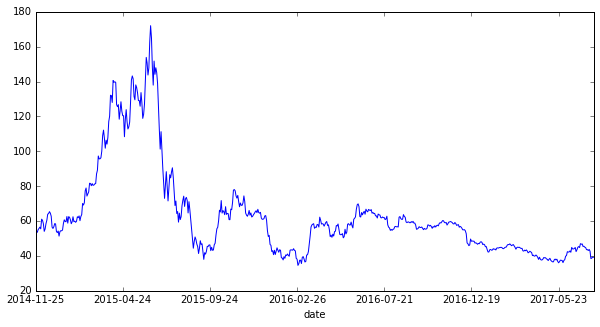

In [90]:
df['close'].plot(figsize=(10, 5))

In [93]:
%%time
df['Ret_Loop'] = 0.0
for i in range(1, len(df)):
    df['Ret_Loop'][i] = np.log(df['close'][i] / df['close'][i-1])

D:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 28.1 s


In [81]:
df[['close', 'Ret_Loop']].tail()

,close,Ret_Loop
date,,
2017-06-26,44.95,0.031871
2017-06-27,45.35,0.008859
2017-06-28,44.81,-0.011979
2017-06-29,47.04,0.048567
2017-06-30,46.46,-0.012407


In [94]:
%time df['Return'] = np.log(df['close'] / df['close'].shift(1))

Wall time: 4 ms


In [95]:
df[['close', 'Ret_Loop', 'Return']].tail()

,close,Ret_Loop,Return
date,,,
2017-07-14,42.73,-0.022904,-0.022904
2017-07-17,38.46,-0.105283,-0.105283
2017-07-18,38.75,0.007512,0.007512
2017-07-19,39.41,0.016889,0.016889
2017-07-20,39.23,-0.004578,-0.004578


一个对数收益率数据列足够了，所以可以删除另一列

In [96]:
del df['Ret_Loop']

**波动率聚集**

波动率不是长期恒定的，既有*高波动率*时期，也有*低波动率*时期

**杠杆效应**

一般来说，波动性和股票市场收益是负相关的；当市场下跌时波动性升高，反之亦然

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0A76B730>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0BD1C610>], dtype=object)

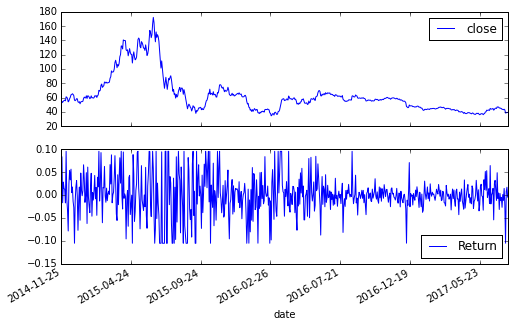

In [97]:
df[['close', 'Return']].plot(subplots = True, style = 'b', figsize=(8,5))

波动率对期权交易者特别重要，而股票交易者对移动平均值更感兴趣、

移动平均值很容易用pandas的rolling_mean函数计算

In [101]:
df['42d'] = pd.rolling_mean(df['close'], window=42)
df['252d'] = pd.rolling_mean(df['close'], window=252)

In [102]:
df[['close', '42d', '252d']].tail()

,close,42d,252d
date,,,
2017-07-14,42.73,41.865476,49.865988
2017-07-17,38.46,41.881429,49.754337
2017-07-18,38.75,41.894762,49.652107
2017-07-19,39.41,41.935714,49.550873
2017-07-20,39.23,41.962143,49.451460


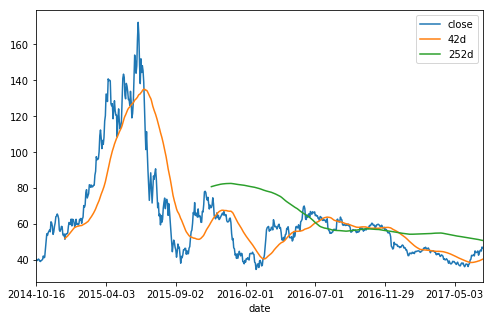

In [89]:
df[['close', '42d', '252d']].plot(figsize=(8,5))

回到期权交易者更喜欢的话题，对数收益率的移动历史标准差--即移动历史波动率--可能更感兴趣

In [104]:
import math
df['Mov_vol'] = pd.rolling_std(df['Return'], window=252) * math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0C113570>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0C206090>], dtype=object)

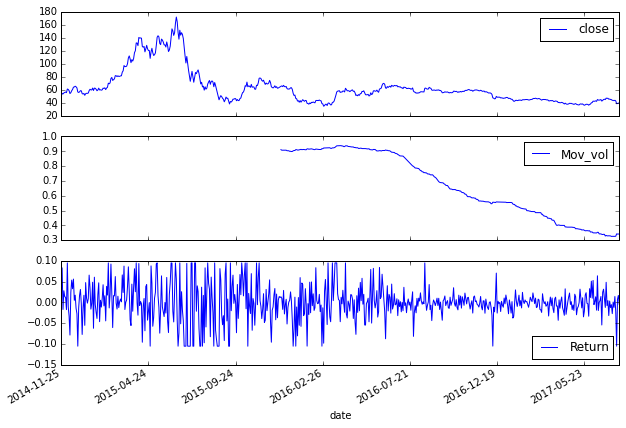

In [105]:
df[['close', 'Mov_vol', 'Return']].plot(subplots = True, style = 'b', figsize = (10,7))

## 6.3 回归分析

杠杆效应是权益市场收益率的典型事实，使用pandas还可以在更正式的统计学基础上进行

最简单的方法是使用*普通最小二乘回归（ols）方法*

使用网络上可以取得两个不同数据集进行分析：

*EURO STOXX 50*

EURO STOXX 50指数的历史每日收盘价，该指数由欧洲蓝筹股组成

*VSTOXX*

VSTOXX波动率指数历史每日收盘价，在EURO STOXX 50指数期权隐含波动率基础上计算

In [107]:
import pandas as pd
from urllib import urlretrieve

In [108]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <httplib.HTTPMessage instance at 0x0C1213F0>)

In [109]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [110]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

上面提到的格式更改可以在文件的3883和3890行之间看到

In [102]:
for line in lines[3883:3890]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



为了使数据集更容易导入，对数据进行如下处理：

1. 生成一个新的文本文件
2. 删除不需要的标题行
3. 在文件中写入对应的新标题行
4. 添加一个辅助列DEL
5. 将所有数据写入新文件

In [111]:
new_file = open('./data/es50.txt', 'w')
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [112]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [113]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)

In [114]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847,2991,343,324,408,350,9072,581,NaN
2016-09-29,2849,2992,343,324,408,351,9112,583,NaN
2016-09-30,2843,3002,343,325,408,350,9116,583,NaN
2016-10-03,2845,2998,343,325,408,351,9131,584,NaN
2016-10-04,2871,3030,346,328,411,354,9212,589,NaN


In [115]:
del es['DEL']

In [116]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [117]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', dayfirst=True, header=None, skiprows=4, names=cols)

In [118]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [121]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


为了实施回归分析，只需要每个数据集中的一列。因此，生成一个新的DataFrame对象，在其中组合两个更感兴趣的列，也是主要的指数列

In [122]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX':es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

In [123]:
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [133]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [134]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D9E23B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D97F3F0>], dtype=object)

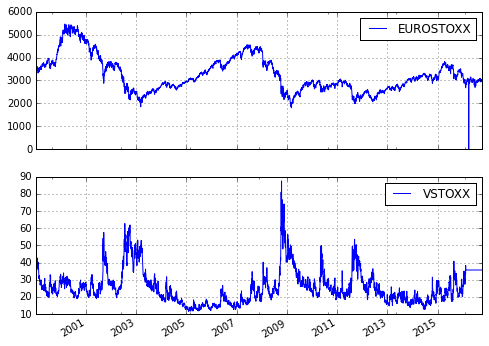

In [135]:
data.plot(subplots=True, grid=True, style='b', figsize = (8, 6))

In [138]:
rets = np.log(data / data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0DC6CF90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0DCDAD90>], dtype=object)

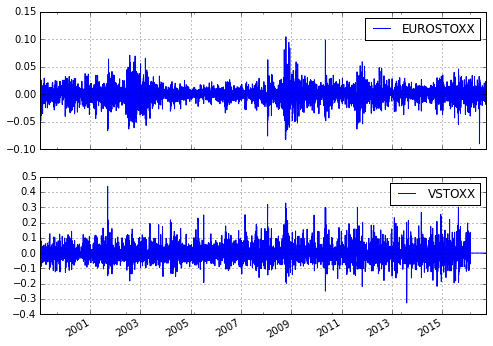

In [139]:
rets.plot(subplots=True, grid=True, style='b', figsize = (8, 6))

In [149]:
xdata = rets['EUROSTOXX']
ydata = rets['VSTOXX']
model = pd.ols(y=ydata, x=xdata)
model

pandas.core.series.Series

## 6.4 高频数据

目前为止，对pandas处理金融时间序列数据的优势了个认识，这种方法的特征在金融分析圈已经非常普遍

对某些市场参与者来说是很大的负担，*高频数据*。

本小节简短地阐述如何处理分时数据

In [150]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [162]:
url1 = 'http://hopey.netfonds.no/posdump.php?'
url2 = 'date=%s%s%s&paper=AAPL.0&csv_format=csv'
url = url1 + url2

In [163]:
year = '2014'
month = '09'
days = ['22', '23', '24', '25']

In [165]:
AAPL = pd.DataFrame()
for day in days:
    AAPL = AAPL.append(pd.read_csv(url % (year, month, day), index_col=0, header=0, parse_dates=True))
AAPL.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']

获取数据集失败，略过这一节

## 6.5 结语

金融时间序列是金融数据最常见和重要的形式，在处理这些数据时通常会选择pandas库。

pandas DataFrame类的模型来自R语言的data.frame类，提供了丰富的属性和方法，可解决你所面对的几乎任何分析问题

此外，pandas可以轻松从各种web数据源读取数据。和纯NumPy或matplotlib相比，它在许多方面自动化了金融时间序列数据的管理